# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [509]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [510]:

df_descr = pd.read_csv('/Users/apedorenko/Desktop/SkillFactory/Stage 2/lesson_02/HW_lesson_02/data/otp_description.csv', sep='\t', encoding='utf8')

In [511]:
# print(df_descr[df_descr['ПОЛЕ']=='PREVIOUS_CARD_NUM_UTILIZED'])
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [512]:
df_train = pd.read_csv('/Users/apedorenko/Desktop/SkillFactory/Stage 2/lesson_02/HW_lesson_02/data/otp_train.csv', sep='\t', encoding='utf8')

In [513]:
df_train.shape

(15223, 52)

In [514]:
df_test = pd.read_csv('/Users/apedorenko/Desktop/SkillFactory/Stage 2/lesson_02/HW_lesson_02/data/otp_test.csv', sep='\t', encoding='utf8')

In [515]:
df_test.shape

(14910, 52)

In [516]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [517]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [518]:
df = df_test.append(df_train).reset_index(drop=True)

In [519]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [521]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Высшее', 'Среднее специальное', 'Неполное среднее'}


MARITAL_STATUS
{'Разведен(а)', 'Гражданский брак', 'Вдовец/Вдова', 'Не состоял в браке', 'Состою в браке'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Сельское хозяйство', 'Нефтегазовая промышленность', 'Салоны красоты и здоровья', 'Маркетинг', 'Сборочные производства', 'Информационные услуги', 'ЧОП/Детективная д-ть', 'Металлургия/Промышленность/Машиностроение', 'Подбор персонала', 'Управляющая компания', 'Юридические услуги/нотариальные услуги', 'Здравоохранение', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Недвижимость', 'Другие сферы', 'Банк/Финансы', 'Транспорт', 'Торговля', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Туризм', 'Энергетика', 'СМИ/Реклама/PR-агенства', 'Строительство', 'Страхование', 'Государственная служба', 'Наука', 'Развлечения/Искусство', 'Информационные технологии'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [522]:
# for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
#     df[i]=df[i].map(lambda x: x.replace(',', '.')).astype('float')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [523]:
#  да, пропуски есть, особенно в данных - справочниках (некоторые забиты NaN )
df[df['GEN_INDUSTRY'].isnull()].shape

(2713, 53)

In [524]:
#  их количество порядка 10%, что значимо, при этом эти параметры (должность, индустрия где работает клиент,
# тип организации) могути влиять на скоринг, поэтому игнорировать их нецелесообразно.
# для этого заменим значение NaN на категорию - "Не определено" 
# тем более, в дальнейшем можно рассмотреть влияние этой категории на результат и исключить ее (т.к. в целом 
# эти столбцы не заполнены у одних и тех же данных)
# for i in ['GEN_INDUSTRY','GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE']:
#         df.loc[df[i].isnull(),i]='Не определено'

In [525]:
# для WORK_TIME (числовое значение) незаполненные значения (их также около 10%) можно заполнить медианой
# df.loc[df['WORK_TIME'].isnull(),'WORK_TIME']=df['WORK_TIME'].median()

In [526]:
#так как поле PREVIOUS_CARD_NUM_UTILIZED заполнено только для 600 записей (2%), этот параметр можно вообще исключить из рассмотрения
# df=df.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [527]:
# их много. имеет смысл провести OneCodeEncoding (правда столбцов будет 451, что-то многовато...)
# df_obj_list=[]
# for i in df.columns: # перебираем все столбцы
#     if (str(df[i].dtype) == 'object'): df_obj_list.append(i)
# del df_obj_list[-1]      
# df=pd.get_dummies(df, columns=df_obj_list)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [528]:
# сделал выше переношу сюда для произвольного датафрэйм
def preproc_data(df_input):
    df_output = df_input.copy()
#     
    df_output=df_output.drop(['AGREEMENT_RK'], axis=1)
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
         df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    for i in ['GEN_INDUSTRY','GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'TP_PROVINCE']:
        df_output.loc[df_output[i].isnull(),i]='Не определено'
    
    df_output.loc[df['WORK_TIME'].isnull(),'WORK_TIME']=df_output['WORK_TIME'].median()
    df_output=df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    df_obj_list=[]
    for i in df_output.columns: 
        if (str(df_output[i].dtype) == 'object'): df_obj_list.append(i)
    del df_obj_list[-1]      
    df_output=pd.get_dummies(df_output, columns=df_obj_list)
#    
    return df_output

In [529]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [530]:
x_train=df_train_preproc.drop(['TARGET'], axis=1)
y_train=df_train_preproc['TARGET']

x_test=df_test_preproc.drop(['TARGET'], axis=1)
y_test=df_test_preproc['TARGET']

#### Задание 5. Обучение и оценка качества разных моделей

In [531]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)


In [532]:
%%time
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models_=[DecisionTreeClassifier(),
         RandomForestClassifier(n_estimators=10),
         LogisticRegression()]
model_names=[]
predict_={}
predict_proba={}

for model_ in models_:
    model_.fit(X_train, Y_train)
    
    model_name=str(model_)[:str(model_).find('(')]
    model_names.append(model_name)
    
    predict_[model_name] = model_.predict(X_test)   
    predict_proba[model_name] = model_.predict_proba(X_test)[:,1]

CPU times: user 1.78 s, sys: 98.2 ms, total: 1.88 s
Wall time: 1.76 s


In [533]:
predict_=pd.DataFrame(predict_,columns=model_names)
predict_proba=pd.DataFrame(predict_proba,columns=model_names)

In [534]:
# Посчитать метрики стандартные
# accuracy, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

metrics_ = {'metrics':['accuracy', 'precision', 'recall']}

for model_name in model_names:
    metrics_[model_name]=[accuracy_score(Y_test, predict_[model_name]),
    precision_score(Y_test, predict_[model_name]),
    recall_score(Y_test, predict_[model_name])]

metrics_=pd.DataFrame(metrics_,columns=
   ['metrics', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'])

In [535]:
metrics_

,metrics,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
0,accuracy,0.795270,0.875848,0.878038
1,precision,0.173540,0.227273,0.333333
2,recall,0.181982,0.009009,0.003604


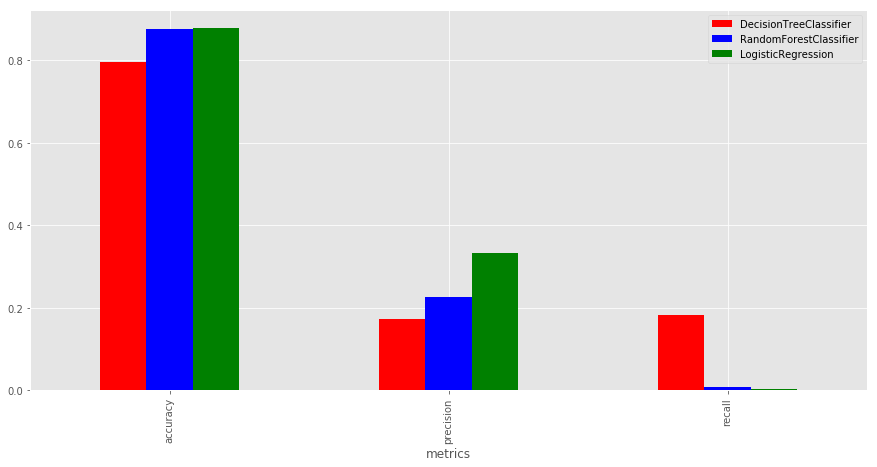

In [536]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

_, ax_my = plt.subplots(figsize=(15,7)) 
metrics_.plot(x='metrics', kind='bar', ax=ax_my, color=['r', 'b', 'g'])


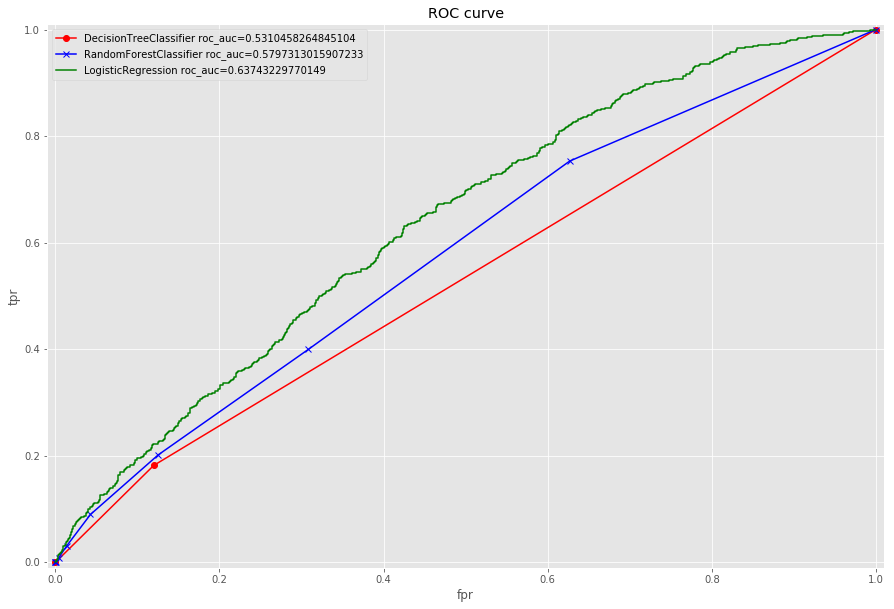

In [537]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(15, 10))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

curve_colors=['ro-', 'bx-','g']

for model_name in model_names:
    fpr, tpr, thresholds = roc_curve(Y_test, predict_proba[model_name])
    plt.plot(fpr, tpr, curve_colors[model_names.index(model_name)] , label=model_name+' roc_auc='+ str(roc_auc_score(Y_test, predict_proba[model_name])))



plt.legend()

In [538]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
avg_roc_auc={}
for model_ in models_:
    avg_roc_auc[str(model_)[:str(model_).find('(')]]=cross_val_score(
        model_,
        X_test,
        Y_test,
        scoring='roc_auc',
        cv=10
       ).mean()

Text(0.5,1,'Средний ROC_auc по кросс-валидации')

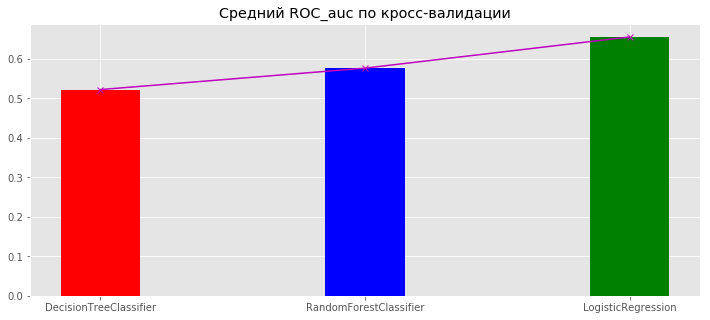

In [539]:
plt.bar(avg_roc_auc.keys(), avg_roc_auc.values(), width=0.3, color=['r', 'b', 'g'])
plt.plot(avg_roc_auc.keys(), avg_roc_auc.values(), 'mx-')
plt.grid(True)
plt.title('Средний ROC_auc по кросс-валидации')


In [540]:
avg_roc_auc

{'DecisionTreeClassifier': 0.5221118949412022,
 'RandomForestClassifier': 0.5763823204716774,
 'LogisticRegression': 0.6554463315929986}

In [541]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
model_=LogisticRegression()
model_.fit(x_train, y_train) # обучение на полном массиве
predict_ = model_.predict(x_test)   
predict_proba = model_.predict_proba(x_test)

In [542]:
# полученный результат - ВСЕ записи в тестовой выборке кроме 8 (ВОСЬМИ, КАРЛ!) "выпадают в шлак", то есть 
# всем этим клиентам банк должен будет отказать. Да и 6 записей из 8 тоже "на грани" - вероятности очечь близки к порогу решения 
pd.DataFrame({'val': predict_[predict_>0], 'prob': predict_proba[predict_>0,1]})

,val,prob
0,1,0.700848
1,1,0.560928
2,1,0.543187
3,1,0.530719
4,1,1.000000
5,1,0.559713
6,1,0.508865
7,1,0.571716


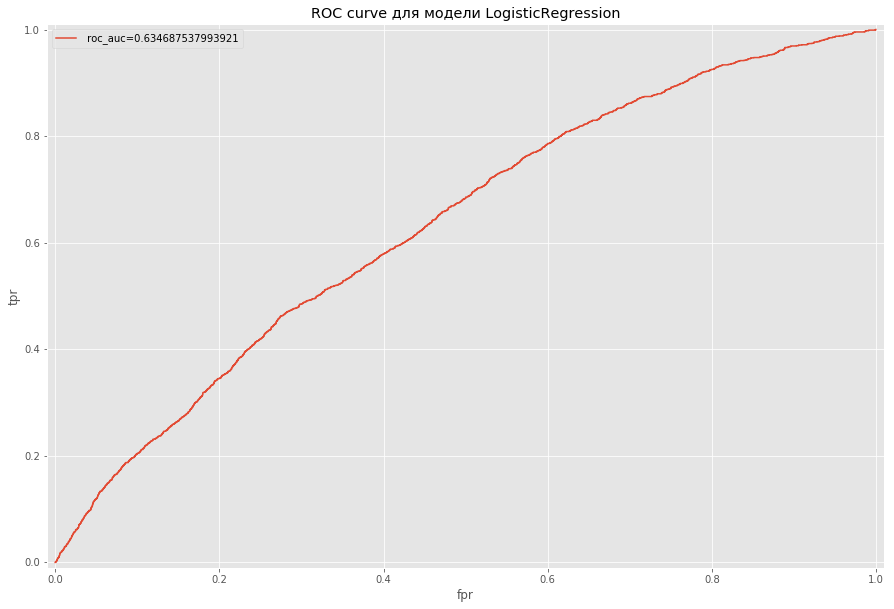

In [543]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)
plt.figure(figsize=(15, 10))
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve для модели LogisticRegression')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

fpr, tpr, thresholds = roc_curve(y_test, predict_proba[:,1])
plt.plot(fpr, tpr,  label=' roc_auc='+ str(roc_auc_score(y_test, predict_proba[:,1])))

plt.legend()
## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [544]:
# Получился очень странный результат - модель, вроде как наиболее качественная по roc_curve и accuracy 
# показывает очень плохие результаты в части recall (он почти нулевой). Да и другие модели также не блещут этим показателем
# Выбранная же модель с точки зрения результата тестирования показала обескураживающий результат.
# Это если представленные ТЕСТОВЫЕ данные действительно имеют усредненную 
# выборку, а не сразу создавались из тех клиентов, которых банк видит как бесперспективных и предполагал им отказать
# Возможно, объем рассматриваемых в выборке параметров слишком велик ? Есть мысль исключить какие-то группы параметров и 
# проверить влияние этого исключения на результат

In [498]:
df = df_test.append(df_train).reset_index(drop=True)


In [545]:
# исключим  данные о месте работы и должности
def preproc_data_1(df_input):
    df_output = df_input.copy()
#     
    df_output=df_output.drop(['GEN_INDUSTRY'], axis=1)
    df_output=df_output.drop(['GEN_TITLE'], axis=1)
    df_output=df_output.drop(['ORG_TP_STATE'], axis=1)
    df_output=df_output.drop(['ORG_TP_FCAPITAL'], axis=1)
 
    df_output=df_output.drop(['AGREEMENT_RK'], axis=1)
    
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
         df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
    for i in ['JOB_DIR', 'TP_PROVINCE']:
        df_output.loc[df_output[i].isnull(),i]='Не определено'
    
    df_output.loc[df['WORK_TIME'].isnull(),'WORK_TIME']=df_output['WORK_TIME'].median()
    
    df_output=df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    df_obj_list=[]
    for i in df_output.columns: 
        if (str(df_output[i].dtype) == 'object'): df_obj_list.append(i)
    del df_obj_list[-1]      
    df_output=pd.get_dummies(df_output, columns=df_obj_list)
#    
    return df_output

In [564]:
# описываем процесс обработки в одной процедуре для разных функций подготовки данных
def process(preproc_data_all):
    global x_train,y_train,x_test,y_test
    
    df_preproc = df.pipe(preproc_data_all)

    df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
    df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

    x_train=df_train_preproc.drop(['TARGET'], axis=1)
    y_train=df_train_preproc['TARGET']

    x_test=df_test_preproc.drop(['TARGET'], axis=1)
    y_test=df_test_preproc['TARGET']

    X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

    metrics_ = {'metrics':['accuracy', 'precision', 'recall', 'roc_auc', 'roc_auc_avg']}

    for model_ in models_:
        model_.fit(X_train, Y_train)
        model_name=str(model_)[:str(model_).find('(')]    
        predict_ = model_.predict(X_test)   
        predict_proba= model_.predict_proba(X_test)[:,1]

        fpr, tpr, thresholds = roc_curve(Y_test, predict_proba)
       
        metrics_[model_name]=[accuracy_score(Y_test, predict_),
            precision_score(Y_test, predict_),
            recall_score(Y_test, predict_),
            roc_auc_score(Y_test, predict_proba),
            cross_val_score(
                model_,
                X_test,
                Y_test,
                scoring='roc_auc',
                cv=10
            ).mean()]

    return pd.DataFrame(metrics_,columns=
       ['metrics', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression'])

In [585]:
metrics_=process(preproc_data_1)
metrics_

,metrics,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
0,accuracy,0.798774,0.876067,0.877819
1,precision,0.179577,0.260870,0.285714
2,recall,0.183784,0.010811,0.003604
3,roc_auc,0.533816,0.581988,0.639117
4,roc_auc_avg,0.513998,0.588930,0.652700


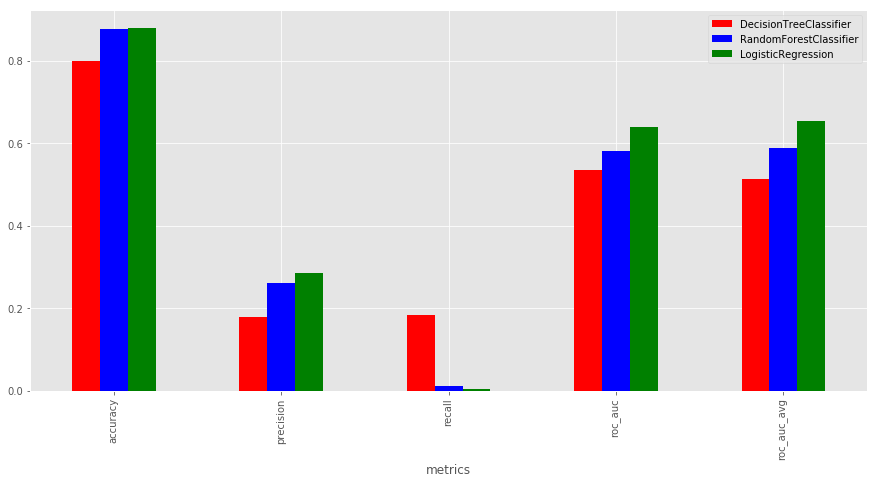

In [588]:
_, ax_my = plt.subplots(figsize=(15,7)) 
metrics_.plot(x='metrics', kind='bar', ax=ax_my, color=['r', 'b', 'g', 'm', 'r'])

In [566]:
model_=LogisticRegression()
model_.fit(x_train, y_train) 
predict_ = model_.predict(x_test)   
predict_proba = model_.predict_proba(x_test)

pd.DataFrame({'val': predict_[predict_>0], 'prob': predict_proba[predict_>0,1]})


,val,prob
0,1,0.541935
1,1,0.681287
2,1,0.570927
3,1,0.536382
4,1,0.561000
5,1,0.540683
6,1,1.000000
7,1,0.538546
8,1,0.526061
9,1,0.634050


In [556]:
# устойчивость результата показывает, что удаленные из выборки параметры (данные о компании, где работает сотрудник)
# не играют значимой роли для принятия решения


In [581]:
# попробуем еще удалить часть данных - адреса
def preproc_data_2(df_input):
    df_output = df_input.copy()
#     
    df_output=df_output.drop(['GEN_INDUSTRY'], axis=1)
    df_output=df_output.drop(['GEN_TITLE'], axis=1)
    df_output=df_output.drop(['ORG_TP_STATE'], axis=1)
    df_output=df_output.drop(['ORG_TP_FCAPITAL'], axis=1)
    df_output=df_output.drop(['JOB_DIR'], axis=1)

    df_output=df_output.drop(['REG_ADDRESS_PROVINCE'], axis=1)
    df_output=df_output.drop(['FACT_ADDRESS_PROVINCE'], axis=1)
    df_output=df_output.drop(['POSTAL_ADDRESS_PROVINCE'], axis=1)
    df_output=df_output.drop(['TP_PROVINCE'], axis=1)
    df_output=df_output.drop(['REGION_NM'], axis=1)

    df_output=df_output.drop(['REG_FACT_FL'], axis=1)
    df_output=df_output.drop(['FACT_POST_FL'], axis=1)
    df_output=df_output.drop(['REG_POST_FL'], axis=1)
    df_output=df_output.drop(['REG_FACT_POST_FL'], axis=1)
    df_output=df_output.drop(['REG_FACT_POST_TP_FL'], axis=1)

    df_output=df_output.drop(['AGREEMENT_RK'], axis=1)
    
    for i in ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']:
         df_output[i]=df_output[i].map(lambda x: x.replace(',', '.')).astype('float')
    
#     for i in ['JOB_DIR' ]:
#         df_output.loc[df_output[i].isnull(),i]='Не определено'
    
    df_output.loc[df['WORK_TIME'].isnull(),'WORK_TIME']=df_output['WORK_TIME'].median()
    
    df_output=df_output.drop(['PREVIOUS_CARD_NUM_UTILIZED'], axis=1)
    
    df_obj_list=[]
    for i in df_output.columns: 
        if (str(df_output[i].dtype) == 'object'): df_obj_list.append(i)
    del df_obj_list[-1]      
    df_output=pd.get_dummies(df_output, columns=df_obj_list)
#    
    return df_output

In [590]:
metrics_=process(preproc_data_2)
metrics_

,metrics,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression
0,accuracy,0.784979,0.874535,0.877819
1,precision,0.177979,0.200000,0.285714
2,recall,0.212613,0.010811,0.003604
3,roc_auc,0.538385,0.597539,0.637300
4,roc_auc_avg,0.514566,0.585177,0.645813


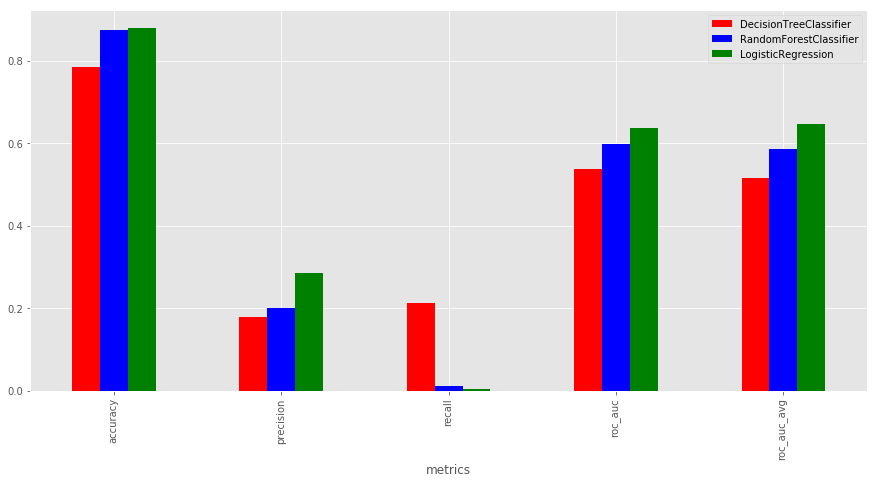

In [591]:
_, ax_my = plt.subplots(figsize=(15,7)) 
metrics_.plot(x='metrics', kind='bar', ax=ax_my, color=['r', 'b', 'g', 'm', 'r'])

In [583]:
model_=LogisticRegression()
model_.fit(x_train, y_train) 
predict_ = model_.predict(x_test)   
predict_proba = model_.predict_proba(x_test)

pd.DataFrame({'val': predict_[predict_>0], 'prob': predict_proba[predict_>0,1]})

,val,prob
0,1,0.689449
1,1,0.532446
2,1,0.520665
3,1,1.000000
4,1,0.569491
